In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import scipy.stats as st

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Dependencies
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# creating an engine using the hawaii.sqlite database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Having a look at the data tables
m = engine.execute("SELECT * FROM measurement LIMIT 15;")
for i in m:
    print(i)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)
(6, 'USC00519397', '2010-01-07', 0.06, 70.0)
(7, 'USC00519397', '2010-01-08', 0.0, 64.0)
(8, 'USC00519397', '2010-01-09', 0.0, 68.0)
(9, 'USC00519397', '2010-01-10', 0.0, 73.0)
(10, 'USC00519397', '2010-01-11', 0.01, 64.0)
(11, 'USC00519397', '2010-01-12', 0.0, 61.0)
(12, 'USC00519397', '2010-01-14', 0.0, 66.0)
(13, 'USC00519397', '2010-01-15', 0.0, 65.0)
(14, 'USC00519397', '2010-01-16', 0.0, 68.0)
(15, 'USC00519397', '2010-01-17', 0.0, 64.0)


In [7]:
s = engine.execute("SELECT * FROM station;")
for i in s:
    print(i)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)
(6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9)
(9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)


In [8]:
# reflect an existing database into a new model
## declaring a Base using 'automap_base()'
Base = automap_base()

# Using the Base class to reflect the dabase tables 
Base.prepare(engine, reflect=True)

In [9]:
# Viewin all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Saving the references to each table by assigning the classes (measurement and station), to variables
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Creating a session (link) from Python to the DB
session = Session(engine)

In [12]:
# diplaying the columns and first row from the tables in a dictionary format
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcf58edf4a8>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'prcp': 0.08,
 'station': 'USC00519397'}

In [13]:
station_first_row = session.query(Station).first()
station_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fcf58edf9e8>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [14]:
# total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [15]:
# finding the min and max date records
earliest_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'The easliest date recorded is {earliest_date[0]}, and the latest is {last_date[0]}')

The easliest date recorded is 2010-01-01, and the latest is 2017-08-23


In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculating the date 1 year ago from the last data point in the database
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# checking results:
print('Query date', query_date)

results = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= query_date).all()

Query date 2016-08-23


In [17]:
# Saving the query results as a Pandas DataFrame
measurement_df = pd.DataFrame(results)
measurement_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [18]:
# Renaming prcp column
measurement_df = measurement_df.rename(columns={'prcp':'precipitation'})
measurement_df.head(3)

,date,precipitation
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08


In [19]:
# setting date as index
measurement_df.set_index('date', inplace=True)

In [20]:
# Sorting the dataframe by date
measurement_df = measurement_df.sort_values('date')
measurement_df

,precipitation
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


In [21]:
measurement_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2230 entries, 2016-08-23 to 2017-08-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  2021 non-null   float64
dtypes: float64(1)
memory usage: 34.8+ KB


In [22]:
# dropping 209 NaN values out of 2230 entries
measurement_df = measurement_df.dropna()

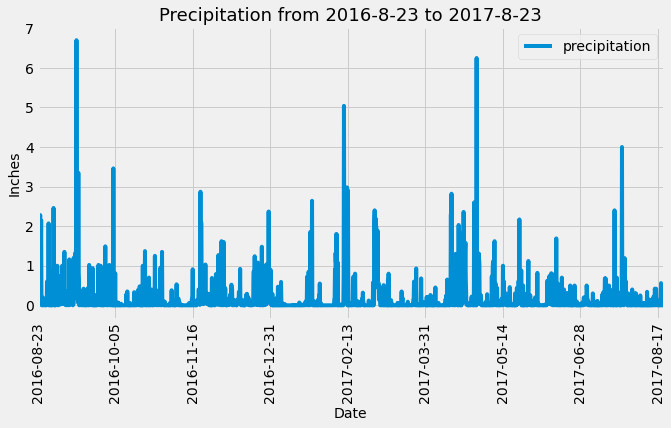

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df.plot(figsize=(10, 5));
plt.xlabel('Date', fontsize=14);
plt.ylabel('Inches', fontsize=14);
plt.title('Precipitation from 2016-8-23 to 2017-8-23', fontsize=18);
plt.xticks(rotation='vertical');
plt.xlim(-.5, len(measurement_df)-.5);
plt.show()

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
num_stations = session.query(Station.id).count()
print(f'The number of available stations is {num_stations}')

The number of available stations is 9


In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
print(f'Station {active_stations[0][0]} is the most active with {active_stations[0][1]} total measurements in the dataset')

Station USC00519281 is the most active with 2772 total measurements in the dataset


In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
calc = [func.min(Measurement.tobs),
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_temps = session.query(*calc).\
                filter(Measurement.station == "USC00519281").all()

print(f'''For the most active station, USC00519281, the calculated temperatures are:
lowest: {station_temps[0][0]},
highest: {station_temps[0][1]},
average: {station_temps[0][2]}.''')

For the most active station, USC00519281, the calculated temperatures are:
lowest: 54.0,
highest: 85.0,
average: 71.66378066378067.


In [29]:
# Choose the station with the highest number of temperature observations.
# Querying the last 12 months of temperature observation data for thie station USC00519281
station_tobs_12m = session.query(Measurement.tobs).\
                filter(Measurement.station == "USC00519281").\
                filter(Measurement.date >= query_date).all()
station_tobs_12m

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [30]:
tobs_list = [tobs[0] for tobs in station_tobs_12m]
len(tobs_list)

352

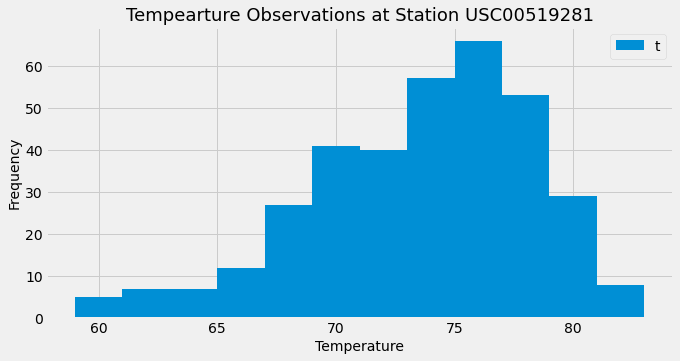

In [31]:
# plotting the histogram for the temps observed at the Station USC00519281
plt.figure(figsize=(10, 5))
plt.hist(tobs_list, bins=12)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Tempearture Observations at Station USC00519281', fontsize=18)
plt.legend('tobs', loc=1)
plt.show()

## Bonus Challenge Assignment

### Temperature Analysis I

* Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, for example, June and December?

In [32]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.
# Querying the information needed to complete the temperature analysis I
jun_temp = session.query(Measurement.date, Measurement.tobs).\
                        filter(func.strftime("%m", Measurement.date) == '06')

jun_temp_analysis = pd.DataFrame(jun_temp)
jun_temp_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1700 non-null   object 
 1   tobs    1700 non-null   float64
dtypes: float64(1), object(1)
memory usage: 26.7+ KB


In [33]:
dec_temp = session.query(Measurement.date, Measurement.tobs).\
                        filter(func.strftime("%m", Measurement.date) == '12')

dec_temp_analysis = pd.DataFrame(dec_temp)
dec_temp_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1517 non-null   object 
 1   tobs    1517 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.8+ KB


In [34]:
dec_temp_analysis.head(3)

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0


In [35]:
jun_avg = jun_temp_analysis.tobs.mean()
jun_avg

74.94411764705882

In [36]:
dec_avg = dec_temp_analysis.tobs.mean()
dec_avg

71.04152933421226

Use the t-test to determine whether the difference in the means, if any, is statistically significant. Will you use a paired t-test, or an unpaired t-test? Why?

* I will use hte unpair t-test because of the different samples size between  June and December.
* Null Hypothersis: There is a meaningful difference between June and December temperature reads in Hawaii.

In [37]:
# Calculate Independent (Two Sample) t-test
st.ttest_ind(jun_temp_analysis.tobs, dec_temp_analysis.tobs, equal_var=False)

Ttest_indResult(statistic=31.355036920962423, pvalue=4.193529835915755e-187)

* Such a small p-value tell us there is statistical significance and the null-hypothesis can be rejected.

### Temperature Analysis II

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [39]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start = '2017-02-28'
trip_end = '2017-03-05'
trip_temps = calc_temps(trip_start, trip_end)
trip_temps

[(64.0, 72.02777777777777, 78.0)]

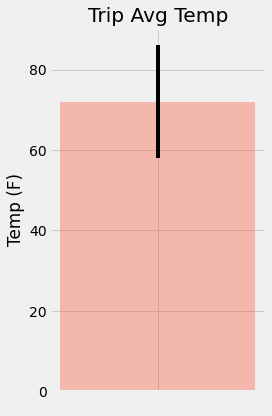

In [40]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
yerr = trip_temps[0][2] - trip_temps[0][0]
#plt.margins(1, 2)
plt.figure(figsize=(4, 6))
plt.bar(' ',trip_temps[0][1], yerr=yerr, color='C1', alpha=0.35)
plt.ylabel('Temp (F)')
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.show()

### Daily Rainfall Average

In [41]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
prcp_stations = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
                filter(Measurement.date >= trip_start).filter(Measurement.date <= trip_end).\
                filter(Measurement.station == Station.station).\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()
for i in prcp_stations:
    print(i)

('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 4.720000000000001)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 4.45)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 4.07)
('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 2.98)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 2.7399999999999998)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 2.32)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 1.1600000000000001)


In [42]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculating the daily normals for my trip
# pushing each tuple of calculations into a list called `normals`
normals_tuple = session.query(Measurement.date).\
            filter(Measurement.date >= trip_start).\
            filter(Measurement.date <= trip_end).all()
normals_list = [i[0] for i in normals_tuple]
normals_list

['2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-02-28',
 '2017-03-01',
 '2017-03-03',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-04',
 '2017-03-05']

In [44]:
# Setting the start and end date of the trip from the previously defined variables, trip_start and trip_end, respectively
normals_start = trip_start.replace('2017-', '')
normals_end = trip_end.replace('2017-', '')

In [45]:
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
normals = [year.replace('2017-', '') for year in normals_list]
normals

['02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05',
 '02-28',
 '03-01',
 '03-03',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05',
 '02-28',
 '03-01',
 '03-02',
 '03-03',
 '03-04',
 '03-05']

In [52]:
# Loop through the list of %m-%d strings and calculate the normals for each date
normals_dict = {'Date': [i for i in normals],
                'Min': [daily_normals(i)[0][0] for i in normals],
                'Avg': [daily_normals(i)[0][1] for i in normals],
                'Max': [daily_normals(i)[0][2] for i in normals]}

In [53]:
normals_dict

{'Date': ['02-28',
  '03-01',
  '03-02',
  '03-03',
  '03-04',
  '03-05',
  '02-28',
  '03-01',
  '03-02',
  '03-03',
  '03-04',
  '03-05',
  '02-28',
  '03-01',
  '03-03',
  '02-28',
  '03-01',
  '03-02',
  '03-03',
  '02-28',
  '03-01',
  '03-02',
  '03-03',
  '03-04',
  '02-28',
  '03-01',
  '03-02',
  '03-03',
  '03-04',
  '03-05',
  '02-28',
  '03-01',
  '03-02',
  '03-03',
  '03-04',
  '03-05'],
 'Min': [65.0,
  64.0,
  61.0,
  60.0,
  57.0,
  60.0,
  65.0,
  64.0,
  61.0,
  60.0,
  57.0,
  60.0,
  65.0,
  64.0,
  60.0,
  65.0,
  64.0,
  61.0,
  60.0,
  65.0,
  64.0,
  61.0,
  60.0,
  57.0,
  65.0,
  64.0,
  61.0,
  60.0,
  57.0,
  60.0,
  65.0,
  64.0,
  61.0,
  60.0,
  57.0,
  60.0],
 'Avg': [70.65517241379311,
  70.0327868852459,
  70.36666666666666,
  70.06896551724138,
  69.27272727272727,
  67.89090909090909,
  70.65517241379311,
  70.0327868852459,
  70.36666666666666,
  70.06896551724138,
  69.27272727272727,
  67.89090909090909,
  70.65517241379311,
  70.0327868852459,
 

In [47]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals_dict)
normals_df.head()

,Date,Min,Avg,Max
0,02-28,65.0,70.655172,80.0
1,03-01,64.0,70.032787,76.0
2,03-02,61.0,70.366667,78.0
3,03-03,60.0,70.068966,78.0
4,03-04,57.0,69.272727,77.0


In [48]:
# setting dates as index
normals_df.set_index('Date', inplace=True)
normals_df

,Min,Avg,Max
Date,,,
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0


In [49]:
normals_df.shape

(36, 3)

<Figure size 1008x432 with 0 Axes>

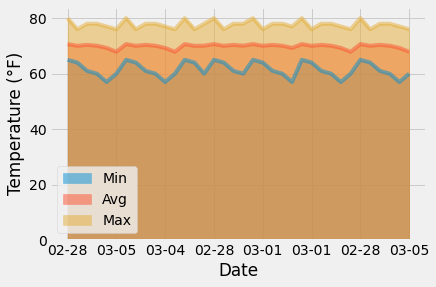

In [50]:
# Plot the daily normals as an area plot with `stacked=False`
plt.figure(figsize=(14, 6))
normals_df.plot.area(stacked=False)
plt.ylabel("Temperature (°F)")
plt.show()